<a href="https://colab.research.google.com/github/Deepika1024/Deepika1024/blob/main/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import matplotlib
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. optimizers import Adam
from keras. models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model

In [9]:
data=pd.read_csv('/content/MSFT.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [10]:
print('Dataframe Shape: ', data. shape)
print('Null Value Present: ', data.isnull().values.any())

Dataframe Shape:  (9083, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

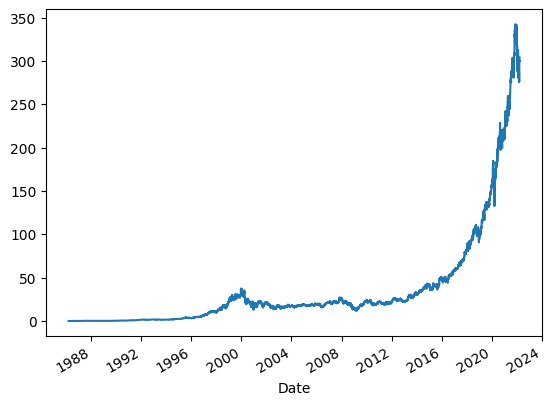

In [11]:
#Plot the True Adj Close Value
data['Adj Close'].plot()

In [12]:
#Set Target Variable
output_var = pd.DataFrame(data['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [14]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=data.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000027,0.000000,1.000000
1986-03-14,0.000025,0.000030,0.000025,0.297096
1986-03-17,0.000035,0.000032,0.000036,0.127119
1986-03-18,0.000040,0.000032,0.000030,0.063588
1986-03-19,0.000033,0.000025,0.000025,0.044285


In [15]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [16]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

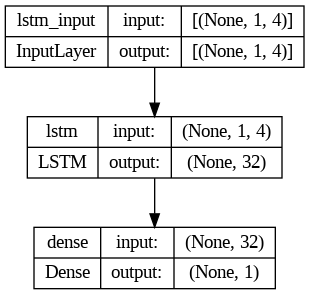

In [17]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [18]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1033/1033 [==============================] - 3s 2ms/step - loss: 90.7619
Epoch 2/100
1033/1033 [==============================] - 2s 2ms/step - loss: 215.1222
Epoch 3/100
1033/1033 [==============================] - 2s 1ms/step - loss: 146.1612
Epoch 4/100
1033/1033 [==============================] - 2s 1ms/step - loss: 79.8975
Epoch 5/100
1033/1033 [==============================] - 2s 1ms/step - loss: 37.9496
Epoch 6/100
1033/1033 [==============================] - 2s 1ms/step - loss: 14.5780
Epoch 7/100
1033/1033 [==============================] - 2s 2ms/step - loss: 5.4117
Epoch 8/100
1033/1033 [==============================] - 2s 2ms/step - loss: 2.8454
Epoch 9/100
1033/1033 [==============================] - 2s 2ms/step - loss: 1.9841
Epoch 10/100
1033/1033 [==============================] - 2s 1ms/step - loss: 1.5314
Epoch 11/100
1033/1033 [==============================] - 2s 1ms/step - loss: 1.2610
Epoch 12/100
1033/1033 [==============================] - 2s 2ms/s

In [19]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

26/26 [==============================] - 0s 974us/step


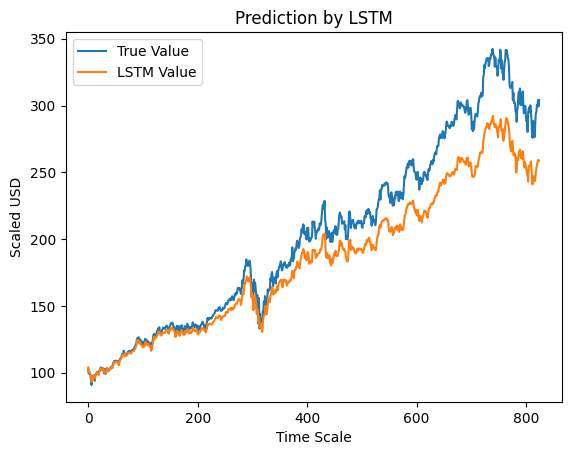

In [20]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

The graph above demonstrates that the extremely basic single LSTM network model created above detects some patterns. We may get a more accurate depiction of every specific company's stock value by fine-tuning many parameters and adding more LSTM layers to the model.